In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt 
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('big17_23.csv')

In [3]:
df

,LastName,FirstName,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score
0,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.800,6.766,NaN,11.566
1,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,qual,"Tokyo, Japan",FX,64.0,4.600,7.633,NaN,12.233
2,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,qual,"Tokyo, Japan",UE,74.0,5.100,6.500,NaN,11.600
3,ABDUL,HADI,w,MAS,SUN 25 JUL 2021,Olympic Games,qual,"Tokyo, Japan",VT,72.0,4.600,8.566,NaN,13.166
4,ABDUL HADI,Farah Ann,w,MAS,25 July 2021,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.800,6.766,NaN,11.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13436,NaN,Kate,w,AUS,29 Oct 2022 - 6 Nov 2022,51st FIG Artistic Gymnastics World Championships,qual,"Liverpool, England",UB,17.0,8.466,5.600,NaN,14.066
13437,NaN,Kate,w,AUS,"29 Jul-2 Aug, 2023",BIRMINGHAM 2022 Commonwealth Games,final,"Birmingham, England",BB,1.0,8.366,5.100,NaN,13.466
13438,NaN,Kate,w,AUS,"29 Jul-2 Aug, 2023",BIRMINGHAM 2022 Commonwealth Games,qual,"Birmingham, England",BB,5.0,7.950,5.000,NaN,12.950
13439,NaN,Kate,w,AUS,"29 Jul-2 Aug, 2023",BIRMINGHAM 2022 Commonwealth Games,final,"Birmingham, England",UB,7.0,7.233,5.300,NaN,12.533


In [4]:
df["Competition"].value_counts()

Competition
51st FIG Artistic Gymnastics World Championships    2523
2023 10th Senior European Championships             1607
2022 Senior European Championships                  1509
World Cup                                           1463
2023 FISH World University Games                     956
Olympic Games                                        765
BIRMINGHAM 2022 Commonwealth Games                   646
EnBW DTB Pokal Team Challenge 2023                   643
Central American and Caribbean Games                 627
2022 British Gymnastics Championships                583
FIG Apparatus World Cup 2023                         571
2023 British Gymnastics Championships                493
2023 Osijek Challenge Cup                            395
2023 Varna World Challenge Cup Results               342
2023 Tel Aviv Challenge Cup                          271
Oceania Continental Championships 2023                47
Name: count, dtype: int64

In [4]:
df["Gender"].value_counts()

Gender
m    7668
w    5773
Name: count, dtype: int64

In [5]:
df.drop_duplicates(inplace=True)
df['Name'] = df['FirstName'] + " " + df['LastName']
df = df.drop(columns=["LastName", "FirstName"])
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
fill_columns = ['Rank', 'D_Score', 'E_Score', 'Score']
df[fill_columns] = df[fill_columns].fillna(0)
df["Penalty"] = df["Penalty"].fillna(0)
df['Total_Score'] = df['D_Score'] + df['E_Score'] - df['Penalty']
df

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_1805/4025673313.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
0,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.800,6.766,0.0,11.566,HADI ABDUL,11.566
1,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",FX,64.0,4.600,7.633,0.0,12.233,HADI ABDUL,12.233
2,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",UE,74.0,5.100,6.500,0.0,11.600,HADI ABDUL,11.600
3,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",VT,72.0,4.600,8.566,0.0,13.166,HADI ABDUL,13.166
4,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.800,6.766,0.0,11.566,Farah Ann ABDUL HADI,11.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13436,w,AUS,NaT,51st FIG Artistic Gymnastics World Championships,qual,"Liverpool, England",UB,17.0,8.466,5.600,0.0,14.066,NaN,14.066
13437,w,AUS,NaT,BIRMINGHAM 2022 Commonwealth Games,final,"Birmingham, England",BB,1.0,8.366,5.100,0.0,13.466,NaN,13.466
13438,w,AUS,NaT,BIRMINGHAM 2022 Commonwealth Games,qual,"Birmingham, England",BB,5.0,7.950,5.000,0.0,12.950,NaN,12.950
13439,w,AUS,NaT,BIRMINGHAM 2022 Commonwealth Games,final,"Birmingham, England",UB,7.0,7.233,5.300,0.0,12.533,NaN,12.533


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13441 entries, 0 to 13440
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       13441 non-null  object        
 1   Country      13229 non-null  object        
 2   Date         9264 non-null   datetime64[ns]
 3   Competition  13441 non-null  object        
 4   Round        13441 non-null  object        
 5   Location     13441 non-null  object        
 6   Apparatus    13441 non-null  object        
 7   Rank         13441 non-null  float64       
 8   D_Score      13441 non-null  float64       
 9   E_Score      13441 non-null  float64       
 10  Penalty      13441 non-null  float64       
 11  Score        13441 non-null  float64       
 12  Name         13396 non-null  object        
 13  Total_Score  13441 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(7)
memory usage: 1.4+ MB


In [7]:
# Separate men and women dataframes
men_df = df[df['Gender'] == 'm']
women_df = df[df['Gender'] == 'w']

In [8]:
men_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7668 entries, 765 to 13432
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       7668 non-null   object        
 1   Country      7525 non-null   object        
 2   Date         5161 non-null   datetime64[ns]
 3   Competition  7668 non-null   object        
 4   Round        7668 non-null   object        
 5   Location     7668 non-null   object        
 6   Apparatus    7668 non-null   object        
 7   Rank         7668 non-null   float64       
 8   D_Score      7668 non-null   float64       
 9   E_Score      7668 non-null   float64       
 10  Penalty      7668 non-null   float64       
 11  Score        7668 non-null   float64       
 12  Name         7646 non-null   object        
 13  Total_Score  7668 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(7)
memory usage: 898.6+ KB


In [9]:
women_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5773 entries, 0 to 13440
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       5773 non-null   object        
 1   Country      5704 non-null   object        
 2   Date         4103 non-null   datetime64[ns]
 3   Competition  5773 non-null   object        
 4   Round        5773 non-null   object        
 5   Location     5773 non-null   object        
 6   Apparatus    5773 non-null   object        
 7   Rank         5773 non-null   float64       
 8   D_Score      5773 non-null   float64       
 9   E_Score      5773 non-null   float64       
 10  Penalty      5773 non-null   float64       
 11  Score        5773 non-null   float64       
 12  Name         5750 non-null   object        
 13  Total_Score  5773 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(7)
memory usage: 676.5+ KB


In [10]:
# women_df.to_csv('women17_23.csv', index=False)

In [11]:
# men_df.to_csv('men17_23.csv', index=False)

## vizualise the change in d scores over time do same with e socre

In [12]:
# # Sort the DataFrame by 'Date'
# df = df.sort_values('Date')

# dfs = df.iloc[:500]

# melted_df = pd.melt(dfs, id_vars=['Date'], value_vars=['D_Score', 'E_Score'], var_name='Score_Type', value_name='Score_Value')

# # Create Altair chart
# chart = alt.Chart(melted_df).mark_line().encode(
#     x='Date:T',
#     y='Score_Value:Q',
#     color='Score_Type:N'
# ).properties(
#     width=600,
#     height=400,
#     title='D_Score and E_Score Over Time'
# )

# chart.configure_legend(
#     title=None
# ).configure_axis(
#     labelFontSize=12,
#     titleFontSize=14
# ).configure_title(
#     fontSize=16,
#     anchor='middle'
# ).interactive()




In [13]:
# women = women_df.drop(columns=["Date"])

In [10]:
women = women_df.dropna()

In [11]:
women.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4032 entries, 0 to 13423
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       4032 non-null   object        
 1   Country      4032 non-null   object        
 2   Date         4032 non-null   datetime64[ns]
 3   Competition  4032 non-null   object        
 4   Round        4032 non-null   object        
 5   Location     4032 non-null   object        
 6   Apparatus    4032 non-null   object        
 7   Rank         4032 non-null   float64       
 8   D_Score      4032 non-null   float64       
 9   E_Score      4032 non-null   float64       
 10  Penalty      4032 non-null   float64       
 11  Score        4032 non-null   float64       
 12  Name         4032 non-null   object        
 13  Total_Score  4032 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(7)
memory usage: 472.5+ KB


In [12]:
# Convert 'Date' column to datetime
women['Date'] = pd.to_datetime(df['Date'])

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_1805/1752192057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women['Date'] = pd.to_datetime(df['Date'])


In [13]:
women.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4032 entries, 0 to 13423
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       4032 non-null   object        
 1   Country      4032 non-null   object        
 2   Date         4032 non-null   datetime64[ns]
 3   Competition  4032 non-null   object        
 4   Round        4032 non-null   object        
 5   Location     4032 non-null   object        
 6   Apparatus    4032 non-null   object        
 7   Rank         4032 non-null   float64       
 8   D_Score      4032 non-null   float64       
 9   E_Score      4032 non-null   float64       
 10  Penalty      4032 non-null   float64       
 11  Score        4032 non-null   float64       
 12  Name         4032 non-null   object        
 13  Total_Score  4032 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(7)
memory usage: 472.5+ KB


In [14]:
women["Date"].value_counts()

Date
2021-07-25 00:00:00    629
2011-08-14 20:22:00    628
2011-04-16 20:23:00    626
2024-03-27 20:22:00    308
2001-08-05 20:23:00    295
2024-06-28 20:23:00    272
2023-03-26 20:23:00    226
2017-03-19 20:23:00    217
2023-02-26 20:23:00    179
2001-03-04 20:23:00    147
2025-05-28 20:23:00    145
2001-06-04 20:23:00    129
2021-07-29 00:00:00     96
2008-06-11 20:23:00     95
2021-08-01 00:00:00     40
Name: count, dtype: int64

In [24]:
women.head(1)

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
0,w,MAS,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,76.0,4.8,6.766,0.0,11.566,HADI ABDUL,11.566


In [31]:
usaw = women[women["Country"]=="USA"]

In [34]:
usaw


,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
53,w,USA,2021-07-25 00:00:00,Olympic Games,qual,"Tokyo, Japan",BB,7.0,6.5,7.566,0.0,14.066,Simone BILES,14.066
54,w,USA,2021-07-25 00:00:00,Olympic Games,qual,"Tokyo, Japan",BB,7.0,6.5,7.566,0.0,14.066,Simone BILES,14.066
55,w,USA,2021-08-01 00:00:00,Olympic Games,final,"Tokyo, Japan",BB,3.0,6.1,7.900,0.0,14.000,Simone BILES,14.000
56,w,USA,2021-07-25 00:00:00,Olympic Games,qual,"Tokyo, Japan",FX,2.0,6.7,7.733,0.3,14.133,Simone BILES,14.133
57,w,USA,2021-07-25 00:00:00,Olympic Games,qual,"Tokyo, Japan",FX,2.0,6.7,7.733,0.3,14.133,Simone BILES,14.133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11374,w,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",BB,1.0,5.8,8.000,0.0,13.800,Ashlee SULLIVAN,13.800
11375,w,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",FX,13.0,5.7,6.950,0.0,12.650,Ashlee SULLIVAN,12.650
11376,w,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",UB,19.0,5.3,7.250,0.0,12.550,Ashlee SULLIVAN,12.550
11377,w,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",VT1,15.0,5.0,8.400,0.3,13.100,Ashlee SULLIVAN,13.100


In [33]:
usaw["Name"].value_counts()

Name
Jade CAREY           16
Sunisa LEE           13
Mykayla SKINNER      11
Simone BILES         10
Joscelyn ROBERSON     8
Jordan CHILES         7
Zoe MILLER            6
Ashlee SULLIVAN       6
Nola MATTHEWS         5
CALLUM Mc             4
Mc Grace CALLUM       3
Name: count, dtype: int64

In [46]:
count_less_than_2 = (women['E_Score'] < 2).sum()
count_less_than_2

145

In [54]:
count_less_than_1 = (women['E_Score'] < 1).sum()
count_less_than_1

143

In [58]:
count_more_than_2 = (women['E_Score'] >= 2).sum()
count_more_than_2

3887

In [60]:
count_more_than_2 = (women['E_Score'] >= 4).sum()
count_more_than_2

3785

In [48]:
d_less_than_2 = (women['D_Score'] < 2).sum()
d_less_than_2

87

In [35]:
grouped = women.groupby('Date').agg({'D_Score': 'mean', 'E_Score': 'mean'}).reset_index()


In [36]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     15 non-null     datetime64[ns]
 1   D_Score  15 non-null     float64       
 2   E_Score  15 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 488.0 bytes


In [37]:
# Convert 'Date' column to datetime64
grouped['Date'] = pd.to_datetime(grouped['Date'])


In [38]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     15 non-null     datetime64[ns]
 1   D_Score  15 non-null     float64       
 2   E_Score  15 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 488.0 bytes


In [19]:
men_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7668 entries, 765 to 13432
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       7668 non-null   object        
 1   Country      7525 non-null   object        
 2   Date         5161 non-null   datetime64[ns]
 3   Competition  7668 non-null   object        
 4   Round        7668 non-null   object        
 5   Location     7668 non-null   object        
 6   Apparatus    7668 non-null   object        
 7   Rank         7668 non-null   float64       
 8   D_Score      7668 non-null   float64       
 9   E_Score      7668 non-null   float64       
 10  Penalty      7668 non-null   float64       
 11  Score        7668 non-null   float64       
 12  Name         7646 non-null   object        
 13  Total_Score  7668 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(7)
memory usage: 898.6+ KB


In [20]:
men=men_df.dropna()

In [21]:
men_grouped = men.groupby('Date').agg({'D_Score': 'mean', 'E_Score': 'mean'}).reset_index()


In [26]:
men_grouped

,Date,D_Score,E_Score
0,2001-03-04 20:23:00,5.403289,7.872470
1,2001-06-04 20:23:00,5.042254,8.001408
2,2001-08-05 20:23:00,7.441316,5.399141
3,2005-05-06 20:23:00,4.640426,8.238681
4,2008-06-11 20:23:00,5.247727,7.699750
5,2011-04-16 20:23:00,4.886442,7.900503
6,2017-03-19 20:23:00,4.690845,7.219298
7,2018-08-21 20:22:00,5.001249,8.096229
8,2023-02-26 20:23:00,5.255102,7.824760
9,2023-03-26 20:23:00,4.574532,5.614232


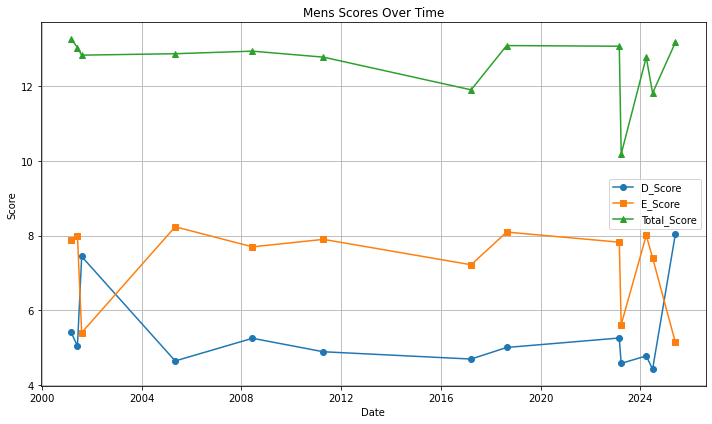

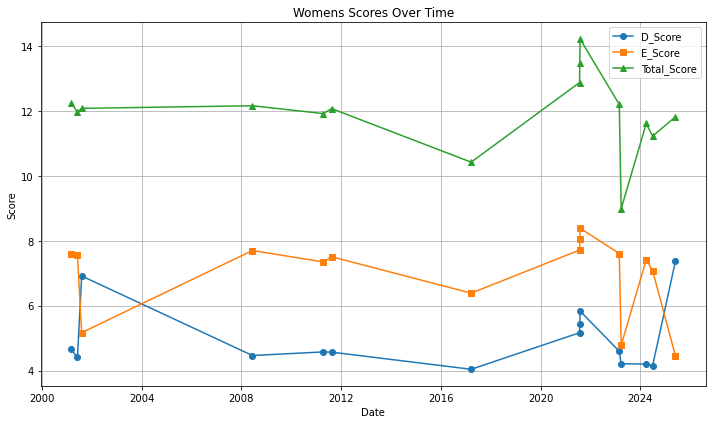

In [27]:
# MEN
# Calculate total score
men_grouped['Total_Score'] = men_grouped['D_Score'] + men_grouped['E_Score']

# Create a line plot using .values
plt.figure(figsize=(10, 6))
plt.plot(men_grouped['Date'].values, men_grouped['D_Score'].values, label='D_Score', marker='o')
plt.plot(men_grouped['Date'].values, men_grouped['E_Score'].values, label='E_Score', marker='s')
plt.plot(men_grouped['Date'].values, men_grouped['Total_Score'].values, label='Total_Score', marker='^')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Score')
plt.title('Mens Scores Over Time')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


# WOMEN
# Calculate total score
grouped['Total_Score'] = grouped['D_Score'] + grouped['E_Score']

# Create a line plot using .values
plt.figure(figsize=(10, 6))
plt.plot(grouped['Date'].values, grouped['D_Score'].values, label='D_Score', marker='o')
plt.plot(grouped['Date'].values, grouped['E_Score'].values, label='E_Score', marker='s')
plt.plot(grouped['Date'].values, grouped['Total_Score'].values, label='Total_Score', marker='^')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Score')
plt.title('Womens Scores Over Time')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()




In [28]:
men = men_df

In [29]:
men.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7668 entries, 765 to 13432
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       7668 non-null   object        
 1   Country      7525 non-null   object        
 2   Date         5161 non-null   datetime64[ns]
 3   Competition  7668 non-null   object        
 4   Round        7668 non-null   object        
 5   Location     7668 non-null   object        
 6   Apparatus    7668 non-null   object        
 7   Rank         7668 non-null   float64       
 8   D_Score      7668 non-null   float64       
 9   E_Score      7668 non-null   float64       
 10  Penalty      7668 non-null   float64       
 11  Score        7668 non-null   float64       
 12  Name         7646 non-null   object        
 13  Total_Score  7668 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(7)
memory usage: 898.6+ KB


In [30]:
# Group the data by 'Apparatus' and sort each group by 'Total_Score' in descending order
grouped_data = men.groupby('Apparatus').apply(lambda x: x.sort_values('Total_Score', ascending=False))
grouped_data

Gender Country                Date  \
Apparatus                                            
FX        13159      m     PHI                 NaT   
          13161      m     PHI                 NaT   
          1345       m     TUR 2018-08-21 20:22:00   
          5342       m     GBR 2018-08-21 20:22:00   
          13158      m     PHI                 NaT   
...                ...     ...                 ...   
hb        7482       m     CAY                 NaT   
          3905       m     SRI                 NaT   
          9042       m     NZL                 NaT   
          1020       m     CAY                 NaT   
          1058       m     BAN                 NaT   

                                                      Competition      Round  \
Apparatus                                                                      
FX        13159  51st FIG Artistic Gymnastics World Championships     AAqual   
          13161  51st FIG Artistic Gymnastics World Championships       qual   
          1345                 2022 Senior European Championships  TeamFinal   
          5342                 2022 Senior European Championships  TeamFinal   
          13158  51st FIG Artistic Gymnastics World Championships    AAfinal   
...                                                           ...        ...   
hb        7482                 BIRMINGHAM 2022 Commonwealth Games       qual   
          3905                 BIRMINGHAM 2022 Commonwealth Games       qual   
          9042                 BIRMINGHAM 2022 Commonwealth Games       qual   
          1020                 BIRMINGHAM 2022 Commonwealth Games       qual   
          1058                 BIRMINGHAM 2022 Commonwealth Games       qual   

                            Location Apparatus  Rank  D_Score  E_Score  \
Apparatus                                                                
FX        13159   Liverpool, England        FX   1.0    6.400    8.866   
          13161   Liverpool, England        FX   1.0    8.866    6.400   
          1345       Munich, Germany        FX   1.0    6.000    9.233   
          5342       Munich, Germany        FX   2.0    6.000    9.200   
          13158   Liverpool, England        FX   1.0    6.400    8.766   
...                              ...       ...   ...      ...      ...   
hb        7482   Birmingham, England        hb  31.0    8.050    3.200   
          3905   Birmingham, England        hb  32.0    7.700    3.000   
          9042   Birmingham, England        hb  33.0    7.000    3.600   
          1020   Birmingham, England        hb  34.0    7.350    2.800   
          1058   Birmingham, England        hb  35.0    5.150    1.800   

                 Penalty   Score                  Name  Total_Score  
Apparatus                                                            
FX        13159      0.0  15.266    Carlos Edriel YULO       15.266  
          13161      0.0  15.266    Carlos Edriel YULO       15.266  
          1345       0.0  15.233             Adem ASIL       15.233  
          5342       0.0  15.200           Jake JARMAN       15.200  
          13158      0.0  15.166    Carlos Edriel YULO       15.166  
...                  ...     ...                   ...          ...  
hb        7482       0.0  11.250        Igor MAGALHAES       11.250  
          3905       0.0  10.700      Ruchira FERNANDO       10.700  
          9042       0.0  10.600  Jorden OCONNELL INNS       10.600  
          1020       0.0  10.150         Karthik ADAPA       10.150  
          1058       4.0   2.950         Shishir AHMED        2.950  

[7668 rows x 14 columns]

In [31]:
# Reset index to remove the ambiguity
grouped_data = grouped_data.reset_index(drop=True)

# Retrieve the top 10 scores for each apparatus
top_10_scores = grouped_data.groupby('Apparatus').head(10)



In [32]:
top_10_scores["Country"].value_counts()

Country
CHN    15
ARM    13
TUR    11
GBR    10
PHI     9
ENG     7
JPN     7
KAZ     7
UKR     5
USA     5
IRI     4
AZE     4
AUS     3
GER     3
GRE     3
IRL     2
CYP     2
ROU     2
HKG     2
BRN     1
ESP     1
TPE     1
ISR     1
SCO     1
Name: count, dtype: int64

In [33]:
usa10 = top_10_scores[top_10_scores["Country"]=="USA"]
usa10["Name"].value_counts()

Name
Brody MALONE            1
Curran PHILLIPS         1
Stephen NEDOROSCIK      1
Joshua Andrew KARNES    1
Asher HONG              1
Name: count, dtype: int64

In [34]:
# Filter the data to include only rows where the country is "USA"
usa_data = men[men['Country'] == 'USA']

# Group the USA data by 'Apparatus' and sort each group by 'Total_Score' in descending order
grouped_usa_data = usa_data.groupby('Apparatus').apply(lambda x: x.sort_values('Total_Score', ascending=False))

# Reset index to remove ambiguity
grouped_usa_data = grouped_usa_data.reset_index(drop=True)

# Retrieve the top ten scores for each apparatus
top_10_usa_scores = grouped_usa_data.groupby('Apparatus').head(10)
top_10_usa_scores

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
0,m,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",FX,2.0,5.7,8.800,0.0,14.500,Yul MOLDAUER,14.500
1,m,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",FX,4.0,5.6,8.700,0.0,14.300,Shane WISKUS,14.300
2,m,USA,NaT,51st FIG Artistic Gymnastics World Championships,AAfinal,"Liverpool, England",FX,6.0,6.0,8.366,0.1,14.266,Asher HONG,14.266
3,m,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",FX,6.0,6.0,8.350,0.1,14.250,Asher HONG,14.250
4,m,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,final,"Stuttgart, Germany",FX,2.0,5.7,8.533,0.0,14.233,Yul MOLDAUER,14.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,m,USA,NaT,51st FIG Artistic Gymnastics World Championships,qual,"Liverpool, England",VT2,27.0,0.0,0.000,0.0,0.000,Donnell WHITTENBURG,0.000
147,m,USA,NaT,World Cup,final,"Cairo, Egypt",VT_1,5.0,5.2,9.300,0.0,14.500,Kameron NELSON,14.500
148,m,USA,NaT,World Cup,qual,"Cairo, Egypt",VT_1,6.0,5.2,9.233,0.1,14.333,Kameron NELSON,14.333
149,m,USA,NaT,World Cup,qual,"Cairo, Egypt",VT_2,6.0,5.2,9.066,0.0,14.266,Kameron NELSON,14.266


In [35]:
top_10_usa_scores["Name"].value_counts()

Name
Asher HONG                     20
Brody MALONE                   13
Donnell WHITTENBURG             8
Frederick Nathaniel RICHARD     6
Yul MOLDAUER                    5
Frederick RICHARD               5
Kameron NELSON                  4
Shane WISKUS                    3
Curran PHILLIPS                 3
Joshua Andrew KARNES            3
Taylor Troy CHRISTOPULOS        2
Stephen NEDOROSCIK              2
Ian SKIRKEY                     2
Riley LOOS                      2
Colt WALKER                     1
Landen Paul BLIXT               1
Name: count, dtype: int64

In [36]:
women = women_df
women.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5773 entries, 0 to 13440
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       5773 non-null   object        
 1   Country      5704 non-null   object        
 2   Date         4103 non-null   datetime64[ns]
 3   Competition  5773 non-null   object        
 4   Round        5773 non-null   object        
 5   Location     5773 non-null   object        
 6   Apparatus    5773 non-null   object        
 7   Rank         5773 non-null   float64       
 8   D_Score      5773 non-null   float64       
 9   E_Score      5773 non-null   float64       
 10  Penalty      5773 non-null   float64       
 11  Score        5773 non-null   float64       
 12  Name         5750 non-null   object        
 13  Total_Score  5773 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(7)
memory usage: 676.5+ KB


In [37]:
grouped_data = women.groupby('Apparatus').apply(lambda x: x.sort_values('Total_Score', ascending=False))


In [38]:
# Reset index to remove the ambiguity
grouped_data = grouped_data.reset_index(drop=True)

# Retrieve the top 10 scores for each apparatus
top_10_scores = grouped_data.groupby('Apparatus').head(10)



In [39]:
top_10_scores["Country"].value_counts()

Country
USA    23
BRA    14
CHN    13
ROC     7
BEL     6
ITA     5
KOR     3
FRA     3
DEN     3
UZB     3
GBR     2
CAN     2
MEX     2
PAN     2
BRN     1
NED     1
Name: count, dtype: int64

In [40]:
usa10 = top_10_scores[top_10_scores["Country"]=="USA"]
usa10["Name"].value_counts()

Name
Sunisa LEE           5
Jade CAREY           5
Mykayla SKINNER      4
Joscelyn ROBERSON    4
Simone BILES         3
Zoe MILLER           1
Shilese JONES        1
Name: count, dtype: int64

In [41]:
# Filter the data to include only rows where the country is "USA"
usa_data = women[women['Country'] == 'USA']

# Group the USA data by 'Apparatus' and sort each group by 'Total_Score' in descending order
grouped_usa_data = usa_data.groupby('Apparatus').apply(lambda x: x.sort_values('Total_Score', ascending=False))

# Reset index to remove ambiguity
grouped_usa_data = grouped_usa_data.reset_index(drop=True)

# Retrieve the top ten scores for each apparatus
top_10_usa_scores = grouped_usa_data.groupby('Apparatus').head(3)
top_10_usa_scores

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
0,w,USA,2021-07-25 00:00:00,Olympic Games,qual,"Tokyo, Japan",BB,3.0,6.200,8.000,0.0,14.200,Sunisa LEE,14.200
1,w,USA,2021-07-25 00:00:00,Olympic Games,qual,"Tokyo, Japan",BB,3.0,6.200,8.000,0.0,14.200,Sunisa LEE,14.200
2,w,USA,2021-07-25 00:00:00,Olympic Games,qual,"Tokyo, Japan",BB,7.0,6.500,7.566,0.0,14.066,Simone BILES,14.066
33,w,USA,2021-08-01 00:00:00,Olympic Games,final,"Tokyo, Japan",FX,1.0,6.300,8.066,0.0,14.360,Jade CAREY,14.366
34,w,USA,NaT,51st FIG Artistic Gymnastics World Championships,AAfinal,"Liverpool, England",FX,3.0,6.100,8.066,0.0,14.166,Jade CAREY,14.166
35,w,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",FX,1.0,6.200,7.950,0.0,14.150,Joscelyn ROBERSON,14.150
66,w,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",UB,1.0,6.400,8.450,0.0,14.850,Zoe MILLER,14.850
67,w,USA,NaT,51st FIG Artistic Gymnastics World Championships,final,"Liverpool, England",UB,2.0,8.366,6.400,0.0,14.766,Shilese JONES,14.766
68,w,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,final,"Stuttgart, Germany",UB,1.0,6.400,8.233,0.0,14.633,Zoe MILLER,14.633
82,w,USA,2021-07-29 00:00:00,Olympic Games,final,"Tokyo, Japan",UE,1.0,6.800,8.500,0.0,15.300,Sunisa LEE,15.300


In [42]:
top_10_usa_scores["Name"].value_counts()

Name
Jade CAREY           6
Sunisa LEE           5
Joscelyn ROBERSON    5
Simone BILES         4
Zoe MILLER           2
Mykayla SKINNER      2
Shilese JONES        1
Name: count, dtype: int64

## Womens Team
- Sunisa LEE           5
- Jade CAREY           5
- Mykayla SKINNER      4
- Joscelyn ROBERSON    4
- Simone BILES         3
- Zoe MILLER           1
- Shilese JONES        1

## Mens Team
- Brody MALONE            1
- Curran PHILLIPS         1
- Stephen NEDOROSCIK      1
- Joshua Andrew KARNES    1
- Asher HONG              1

In [43]:
Sunisa = df[df["Name"] == "Sunisa LEE"]

In [44]:
SUNR = Sunisa[Sunisa["Rank"] < 4]

In [45]:
SUNR

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
318,w,USA,2021-07-29,Olympic Games,final,"Tokyo, Japan",BB,2.0,6.1,7.733,0.0,13.833,Sunisa LEE,13.833
319,w,USA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,3.0,6.2,8.000,0.0,14.200,Sunisa LEE,14.200
320,w,USA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,3.0,6.2,8.000,0.0,14.200,Sunisa LEE,14.200
325,w,USA,2021-07-29,Olympic Games,final,"Tokyo, Japan",UE,1.0,6.8,8.500,0.0,15.300,Sunisa LEE,15.300
326,w,USA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",UE,2.0,6.6,8.600,0.0,15.200,Sunisa LEE,15.200
327,w,USA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",UE,2.0,6.6,8.600,0.0,15.200,Sunisa LEE,15.200
328,w,USA,2021-08-01,Olympic Games,final,"Tokyo, Japan",UE,3.0,6.2,8.300,0.0,14.500,Sunisa LEE,14.500


In [46]:
SUNR[SUNR["Round"]== "final"]

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
318,w,USA,2021-07-29,Olympic Games,final,"Tokyo, Japan",BB,2.0,6.1,7.733,0.0,13.833,Sunisa LEE,13.833
325,w,USA,2021-07-29,Olympic Games,final,"Tokyo, Japan",UE,1.0,6.8,8.500,0.0,15.300,Sunisa LEE,15.300
328,w,USA,2021-08-01,Olympic Games,final,"Tokyo, Japan",UE,3.0,6.2,8.300,0.0,14.500,Sunisa LEE,14.500


## Sunisa LEE
- UE 15.300
- BB 13.833


In [47]:
Jade = df[df["Name"] == "Jade CAREY"]

In [48]:
jader = Jade[Jade["Rank"] < 4]

In [49]:
jader[jader["Round"] == "final"]

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
104,w,USA,2021-07-29,Olympic Games,final,"Tokyo, Japan",FX,3.0,6.300,7.766,0.1,13.966,Jade CAREY,13.966
107,w,USA,2021-08-01,Olympic Games,final,"Tokyo, Japan",FX,1.0,6.300,8.066,0.0,14.360,Jade CAREY,14.366
111,w,USA,2021-07-29,Olympic Games,final,"Tokyo, Japan",VT,2.0,6.000,9.200,0.0,15.200,Jade CAREY,15.200
2372,w,USA,NaT,51st FIG Artistic Gymnastics World Championships,final,"Liverpool, England",FX,3.0,7.833,5.900,0.0,13.733,Jade CAREY,13.733
2379,w,USA,NaT,51st FIG Artistic Gymnastics World Championships,final,"Liverpool, England",VT2,1.0,9.300,5.000,0.0,14.300,Jade CAREY,14.300


## Jade CAREY
- FX 14.366
- VT 15.200
- VT2 14.300

In [50]:
Mykayla = df[df["Name"] == "Mykayla SKINNER"]

In [51]:
mykf = Mykayla[Mykayla["Round"]=="final"]

In [52]:
mykf[mykf["Rank"] < 4]

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
609,w,USA,2021-08-01,Olympic Games,final,"Tokyo, Japan",VT1,2.0,6.0,9.033,0.0,15.033,Mykayla SKINNER,15.033
611,w,USA,2021-08-01,Olympic Games,final,"Tokyo, Japan",VT2,2.0,5.8,9.000,0.0,14.800,Mykayla SKINNER,14.800


## Mykayla SKINNER
- VT1 15.033
- VT2 14.800

In [53]:
Joscelyn=df[df["Name"] == "Joscelyn ROBERSON"]

In [54]:
jof = Joscelyn[Joscelyn["Round"] == "final"]

In [55]:
jof[jof["Rank"] < 4]

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
10159,w,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,final,"Stuttgart, Germany",FX,2.0,5.6,7.700,0.0,13.300,Joscelyn ROBERSON,13.300
10162,w,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,final,"Stuttgart, Germany",VT1,1.0,5.2,9.033,0.0,14.233,Joscelyn ROBERSON,14.233
10164,w,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,final,"Stuttgart, Germany",VT2,1.0,5.0,8.933,0.0,13.933,Joscelyn ROBERSON,13.933
10166,w,USA,NaT,World Cup,final,"Cairo, Egypt",BB,2.0,5.8,7.433,0.0,13.233,Joscelyn ROBERSON,13.233
10168,w,USA,NaT,World Cup,final,"Cairo, Egypt",FX,1.0,5.9,7.800,0.0,13.700,Joscelyn ROBERSON,13.700
10171,w,USA,NaT,World Cup,final,"Cairo, Egypt",VT_1,1.0,5.2,8.833,0.0,14.033,Joscelyn ROBERSON,14.033
10173,w,USA,NaT,World Cup,final,"Cairo, Egypt",VT_2,1.0,5.0,8.933,0.0,13.933,Joscelyn ROBERSON,13.933


## Joscelyn ROBERSON
- FX 13.300
- VT1 14.233
- VT2 13.933
- BB 13.233

In [56]:
Simone = df[df["Name"] == "Simone BILES"]

In [57]:
Simone

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
53,w,USA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,7.0,6.5,7.566,0.0,14.066,Simone BILES,14.066
54,w,USA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",BB,7.0,6.5,7.566,0.0,14.066,Simone BILES,14.066
55,w,USA,2021-08-01,Olympic Games,final,"Tokyo, Japan",BB,3.0,6.1,7.900,0.0,14.000,Simone BILES,14.000
56,w,USA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",FX,2.0,6.7,7.733,0.3,14.133,Simone BILES,14.133
57,w,USA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",FX,2.0,6.7,7.733,0.3,14.133,Simone BILES,14.133
58,w,USA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",UE,10.0,6.2,8.366,0.0,14.566,Simone BILES,14.566
59,w,USA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",UE,10.0,6.2,8.366,0.0,14.566,Simone BILES,14.566
60,w,USA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",VT,4.0,6.0,9.266,0.3,14.966,Simone BILES,14.966
61,w,USA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",VT1,1.0,6.0,9.266,0.3,14.966,Simone BILES,14.966
62,w,USA,2021-07-25,Olympic Games,qual,"Tokyo, Japan",VT2,1.0,5.8,9.600,0.3,15.400,Simone BILES,15.100


In [58]:
simf = Simone[Simone["Round"] == "final"]

In [59]:
simf[simf["Rank"] < 4]

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
55,w,USA,2021-08-01,Olympic Games,final,"Tokyo, Japan",BB,3.0,6.1,7.9,0.0,14.0,Simone BILES,14.0


## Simone BILES
- BB 14.0

In [60]:
df[df["Name"] == "Zoe MILLER"]

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
8154,w,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",BB,10.0,5.2,7.700,0.0,12.900,Zoe MILLER,12.900
8155,w,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",FX,38.0,5.0,6.250,0.4,10.850,Zoe MILLER,10.850
8156,w,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,final,"Stuttgart, Germany",UB,1.0,6.4,8.233,0.0,14.633,Zoe MILLER,14.633
8157,w,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",UB,1.0,6.4,8.450,0.0,14.850,Zoe MILLER,14.850
8158,w,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",VT1,4.0,4.6,9.300,0.0,13.900,Zoe MILLER,13.900
8159,w,USA,2017-03-19 20:23:00,EnBW DTB Pokal Team Challenge 2023,qual,"Stuttgart, Germany",VT2,4.0,0.0,0.000,0.0,0.000,Zoe MILLER,0.000


## Zoe MILLER
- UB 14.633

In [61]:
df[df["Name"]== "Shilese JONES"]

,Gender,Country,Date,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Name,Total_Score
5522,w,USA,NaT,51st FIG Artistic Gymnastics World Championships,AAfinal,"Liverpool, England",BB,5.0,5.200,7.900,0.0,13.100,Shilese JONES,13.100
5523,w,USA,NaT,51st FIG Artistic Gymnastics World Championships,AAqual,"Liverpool, England",BB,10.0,5.200,8.000,0.0,13.200,Shilese JONES,13.200
5524,w,USA,NaT,51st FIG Artistic Gymnastics World Championships,qual,"Liverpool, England",BB,10.0,8.000,5.200,0.0,13.200,Shilese JONES,13.200
5525,w,USA,NaT,51st FIG Artistic Gymnastics World Championships,AAfinal,"Liverpool, England",FX,8.0,5.500,8.200,0.0,13.700,Shilese JONES,13.700
5526,w,USA,NaT,51st FIG Artistic Gymnastics World Championships,AAqual,"Liverpool, England",FX,6.0,5.700,8.100,0.0,13.800,Shilese JONES,13.800
5527,w,USA,NaT,51st FIG Artistic Gymnastics World Championships,qual,"Liverpool, England",FX,6.0,8.100,5.700,0.0,13.800,Shilese JONES,13.800
5528,w,USA,NaT,51st FIG Artistic Gymnastics World Championships,AAfinal,"Liverpool, England",UB,1.0,6.300,8.066,0.0,14.366,Shilese JONES,14.366
5529,w,USA,NaT,51st FIG Artistic Gymnastics World Championships,AAqual,"Liverpool, England",UB,5.0,6.300,8.266,0.0,14.566,Shilese JONES,14.566
5530,w,USA,NaT,51st FIG Artistic Gymnastics World Championships,final,"Liverpool, England",UB,2.0,8.366,6.400,0.0,14.766,Shilese JONES,14.766
5531,w,USA,NaT,51st FIG Artistic Gymnastics World Championships,qual,"Liverpool, England",UB,5.0,8.266,6.300,0.0,14.566,Shilese JONES,14.566


## Shilese JONES
- UB 14.766

# Top Women:

## Sunisa LEE
- UE 15.300
- BB 13.833

## Jade CAREY
- FX 14.366
- VT 15.200
- VT2 14.300

## Mykayla SKINNER
- VT1 15.033
- VT2 14.800

## Joscelyn ROBERSON
- FX 13.300
- VT1 14.233
- VT2 13.933
- BB 13.233


## Simone BILES
- BB 14.0


## Zoe MILLER
- UB 14.633

## Shilese JONES
- UB 14.766

Brody MALONE            1
Curran PHILLIPS         1
Stephen NEDOROSCIK      1
Joshua Andrew KARNES    1
Asher HONG              1

# Men

## Brody MALONE  HB 14.800
## Curran PHILLIPS  PB 15.500
## Stephen NEDOROSCIK PH 15.233
## Joshua Andrew KARNES VT  	14.733
## Asher HONG VT1 15.450